In [2]:
import sys
sys.path.append("/home/winter/code/TreeSeg/notebooks/")
import numpy as np
from PIL import Image
from config.Preprocessing import *
from core.visualize import display_images

In [3]:
config = Configuration(folder="full_area2")

/home/winter/code-resources/treeseg/full_area2/results/ndvi_0.png
(4, 1316, 1770)
shape:  (1, 1316, 1770, 4)


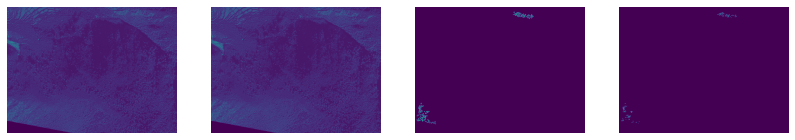

In [4]:
sampleImage = '_0.png'
fn = os.path.join(config.path_to_write, config.extracted_ndvi_filename + sampleImage )
print(fn)

ndvi_img = Image.open(fn)
pan_img = Image.open(fn.replace(config.extracted_ndvi_filename ,config.extracted_pan_filename))
annotation_im = Image.open(fn.replace(config.extracted_ndvi_filename ,config.extracted_annotation_filename))
weight_im = Image.open(fn.replace(config.extracted_ndvi_filename ,config.extracted_boundary_filename))

read_ndvi_img = np.array(ndvi_img)
read_pan_img = np.array(pan_img)
read_annotation = np.array(annotation_im)
read_weight = np.array(weight_im)

all_images = np.array([read_ndvi_img, read_pan_img, read_annotation, read_weight ])
print(all_images.shape)

display_images(np.expand_dims(np.transpose(all_images, axes=(1,2,0)), axis=0))
# plt.imshow(read_weight)

split: 12x16
(4, 1296, 1728)
(4, 108, 108)
0,0: 0.0
0,1: 0.0
0,2: 0.0
0,3: 0.0
0,4: 0.0
0,5: 0.0
0,6: 0.0
0,7: 0.0
0,8: 0.0
0,9: 0.049468449931412896
shape:  (1, 108, 108, 4)
0,9 mean: 0.049468449931412896
0,10: 0.06155692729766804
shape:  (1, 108, 108, 4)
0,10 mean: 0.06155692729766804
0,11: 0.018689986282578876
shape:  (1, 108, 108, 4)
0,11 mean: 0.018689986282578876
0,12: 0.0
0,13: 0.0
0,14: 0.0
0,15: 0.0
1,0: 0.0
1,1: 0.0
1,2: 0.0
1,3: 0.0
1,4: 0.0
1,5: 0.0
1,6: 0.0
1,7: 0.0
1,8: 0.0
1,9: 0.0013717421124828531
1,10: 0.024777091906721536
shape:  (1, 108, 108, 4)
1,10 mean: 0.024777091906721536
1,11: 0.014660493827160493
shape:  (1, 108, 108, 4)
1,11 mean: 0.014660493827160493
1,12: 0.0
1,13: 0.0
1,14: 0.0
1,15: 0.0
2,0: 0.0
2,1: 0.0
2,2: 0.0
2,3: 0.0
2,4: 0.0
2,5: 0.0
2,6: 0.0
2,7: 0.0
2,8: 0.0
2,9: 0.0
2,10: 0.0
2,11: 0.0
2,12: 0.0
2,13: 0.0
2,14: 0.0
2,15: 0.0
3,0: 0.0
3,1: 0.0
3,2: 0.0
3,3: 0.0
3,4: 0.0
3,5: 0.0
3,6: 0.0
3,7: 0.0
3,8: 0.0
3,9: 0.0
3,10: 0.0
3,11: 0.0
3,12: 0.0
3,

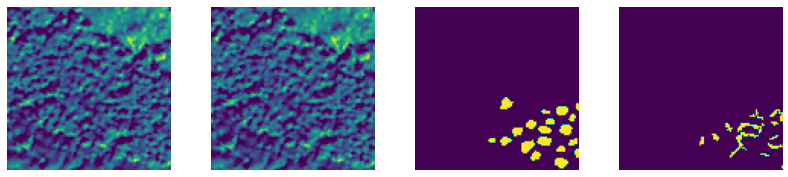

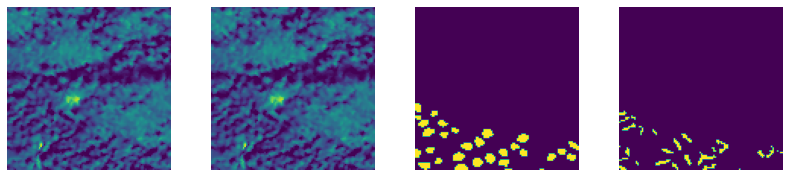

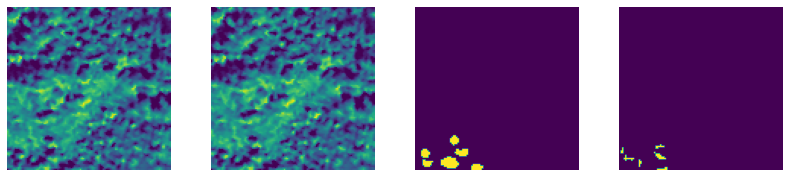

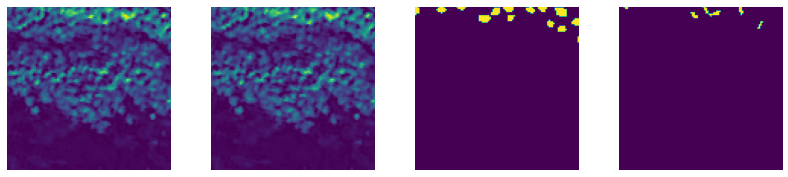

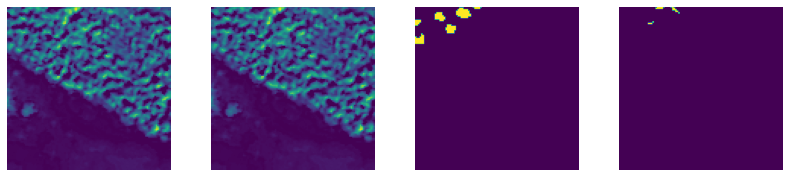

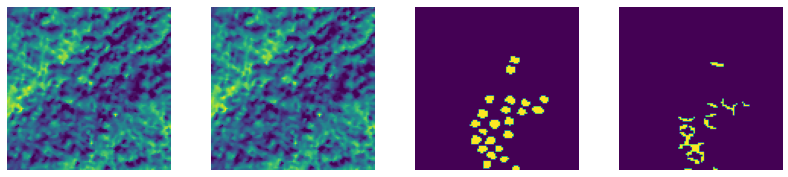

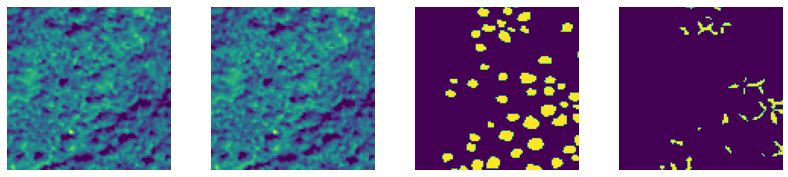

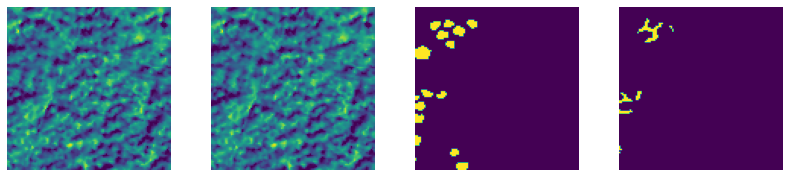

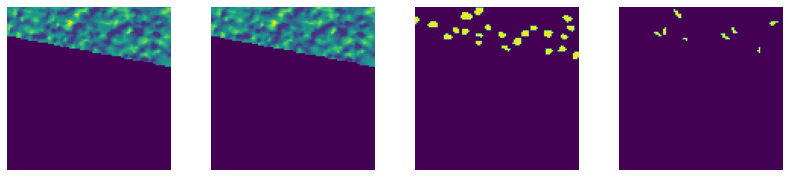

In [6]:
SPLIT_UNIT = 108
(channel, height, width) = all_images.shape
row_split_count = int(height/SPLIT_UNIT)
col_split_count = int(width/SPLIT_UNIT)
print(f"split: {row_split_count}x{col_split_count}")

trim_img = all_images[:,:row_split_count*SPLIT_UNIT, :col_split_count*SPLIT_UNIT]
print(trim_img.shape)

split_row = np.split(trim_img, row_split_count, axis=1)
split_col = [np.split(row_img, col_split_count, axis=2) for row_img in split_row]
print(split_col[0][0].shape)
for i in range(row_split_count):
    for j in range(col_split_count):
        mean_v = np.mean(split_col[i][j][2,:,:])
        print(f"{i},{j}: {mean_v}")
        if mean_v>0.01: 
            display_images(np.expand_dims(np.transpose(split_col[i][j], axes=(1,2,0)), axis=0))
            print(f"{i},{j} mean: {mean_v}")